In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
% matplotlib inline

### DEPARTMENT TABLE

In [86]:
dep=pd.read_csv('departments.csv')     
dep.head()


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [23]:
depnum=dep.department_id.max()         # number of departments
depnum

21

In [24]:
dep.isnull().sum()                    #no missing values

department_id    0
department       0
dtype: int64

### AISLES TABLE

In [25]:
aisles=pd.read_csv('aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [26]:
aislenum=aisles.aisle_id.max()           # number of aisle
aislenum

134

In [27]:
aisles.isnull().sum()        # no missing values

aisle_id    0
aisle       0
dtype: int64

# ORDERS TABLE

In [28]:
orders=pd.read_csv('orders.csv')
orders.head()    #order_dow days of the week

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [29]:
orders.order_number.max()  

100

In [30]:
hrave=orders['order_hour_of_day'].mean()    # ave hour of day for most orders

In [31]:
dayave= orders['days_since_prior_order'].mean()   # ave days between orders

In [32]:
orders.isnull().sum()      #missing values in orders table

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

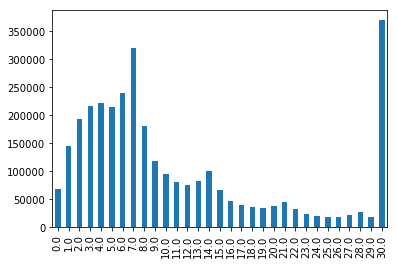

In [33]:
orders.days_since_prior_order.value_counts().sort_index().plot(kind='bar')

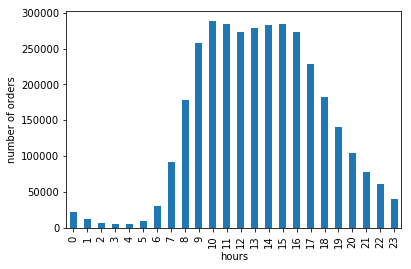

In [34]:
orders.order_hour_of_day.value_counts().sort_index().plot(kind='bar')
_=plt.xlabel('hours')
_=plt.ylabel('number of orders')

### SEPERATED ORDERS TABLE

In [35]:
orders.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [36]:
oprior=orders[orders.eval_set=='prior']
otrain=orders[orders.eval_set=='train']
otest=orders[orders.eval_set=='test']

In [37]:
oprior.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [38]:
otrain.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
49,2196797,5,train,5,0,11,6.0
74,525192,7,train,21,2,11,6.0
78,880375,8,train,4,1,14,10.0


In [39]:
otest.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0


### PRODUCTS TABLE

In [40]:
prod=pd.read_csv('products.csv')
prod.head()
prodnum=prod.product_id.max()     #number of products available
prod.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [87]:
prodnum

49688

In [41]:
prod.isnull().sum()          # no missing value

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [42]:
top5prodep=prod.department_id.value_counts().head()    # top 5 departments with most products 
top5prodep

11    6563
19    6264
13    5371
7     4365
1     4007
Name: department_id, dtype: int64

## ORDER PRODUCTS PRIOR TABLE

In [43]:
prior=pd.read_csv('order_products__prior.csv')
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [44]:
prior.isnull().sum()         # no missing values

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [45]:
prior.order_id.value_counts().head()

1564244    145
790903     137
61355      127
2970392    121
2069920    116
Name: order_id, dtype: int64

## ORDER PRODUCTS TRAIN TABLE

In [46]:
train=pd.read_csv('order_products__train.csv')
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [47]:
train.isnull().sum()     # no missing values

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [48]:
samp=pd.read_csv('sample_submission.csv')
samp.head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [49]:
samp.isnull().sum()     # no missing values

order_id    0
products    0
dtype: int64

## MERGING TABLES


### USING TRAIN DATA

In [50]:
alltrain=otrain.merge(train)
alltrain.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1187899,1,train,11,4,8,14.0,196,1,1
1,1187899,1,train,11,4,8,14.0,25133,2,1
2,1187899,1,train,11,4,8,14.0,38928,3,1
3,1187899,1,train,11,4,8,14.0,26405,4,1
4,1187899,1,train,11,4,8,14.0,39657,5,1


In [51]:
otrain.shape

(131209, 7)

In [52]:
train.shape

(1384617, 4)

In [53]:
alltrain.shape

(1384617, 10)

In [54]:
prod.shape

(49688, 4)

In [55]:
alltrain=alltrain.merge(prod)
alltrain.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7
1,2757217,67,train,25,0,11,5.0,196,1,1,Soda,77,7
2,632715,676,train,12,0,13,26.0,196,2,1,Soda,77,7
3,1167274,760,train,5,4,10,8.0,196,2,1,Soda,77,7
4,3347074,804,train,16,3,21,5.0,196,4,0,Soda,77,7


In [56]:
alltrain.shape

(1384617, 13)

In [57]:
dep.shape

(21, 2)

In [58]:
alltrain=alltrain.merge(dep)
alltrain.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7,beverages
1,2757217,67,train,25,0,11,5.0,196,1,1,Soda,77,7,beverages
2,632715,676,train,12,0,13,26.0,196,2,1,Soda,77,7,beverages
3,1167274,760,train,5,4,10,8.0,196,2,1,Soda,77,7,beverages
4,3347074,804,train,16,3,21,5.0,196,4,0,Soda,77,7,beverages


In [59]:
alltrain.shape

(1384617, 14)

In [60]:
aisles.shape

(134, 2)

In [61]:
alltrain=alltrain.merge(aisles)
alltrain.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7,beverages,soft drinks
1,2757217,67,train,25,0,11,5.0,196,1,1,Soda,77,7,beverages,soft drinks
2,632715,676,train,12,0,13,26.0,196,2,1,Soda,77,7,beverages,soft drinks
3,1167274,760,train,5,4,10,8.0,196,2,1,Soda,77,7,beverages,soft drinks
4,3347074,804,train,16,3,21,5.0,196,4,0,Soda,77,7,beverages,soft drinks


In [62]:
alltrain.shape

(1384617, 15)

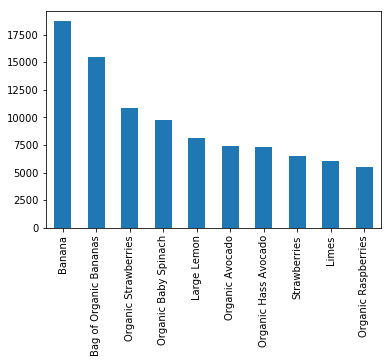

In [90]:
#Top 10 Most ordered products
top10prodtrain=alltrain.product_name.value_counts().head(10)
top10prodtrain.plot(kind='bar')


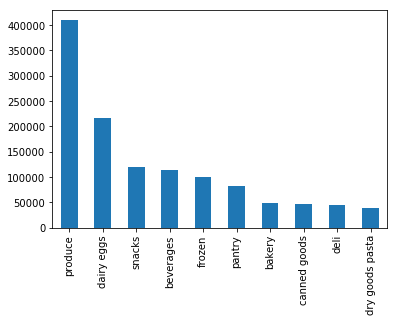

In [91]:
#Top 10 most ordered departments
top10deptrain=alltrain.department.value_counts().head(10)
top10deptrain.plot(kind='bar')

In [65]:
top10_users=alltrain.user_id.value_counts()

In [71]:
#Averate number of products per order 
alltrain.groupby('order_id')['product_name'].size().mean()

10.552759338155157

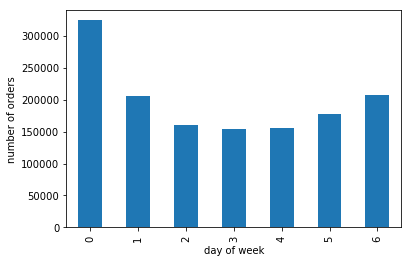

In [75]:
#Day of the week people order the most (0- Monday)
alltrain.order_dow.value_counts().sort_index().plot(kind='bar')
_=plt.xlabel('day of week')
_=plt.ylabel('number of orders')
plt.show()

#### USING PRIOR DATA

In [80]:
allprior=oprior.merge(prior)
allprior=allprior.merge(prod)
allprior=allprior.merge(dep)
allprior=allprior.merge(aisles)
allprior

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,beverages,soft drinks
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,beverages,soft drinks
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,beverages,soft drinks
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,beverages,soft drinks
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,beverages,soft drinks
5,3367565,1,prior,6,2,7,19.0,196,1,1,Soda,77,7,beverages,soft drinks
6,550135,1,prior,7,1,9,20.0,196,1,1,Soda,77,7,beverages,soft drinks
7,3108588,1,prior,8,1,14,14.0,196,2,1,Soda,77,7,beverages,soft drinks
8,2295261,1,prior,9,1,16,0.0,196,4,1,Soda,77,7,beverages,soft drinks
9,2550362,1,prior,10,4,8,30.0,196,1,1,Soda,77,7,beverages,soft drinks


In [81]:
allprior.shape

(32434489, 15)

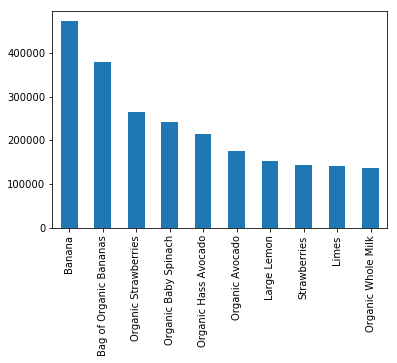

In [84]:
top10prodprior=allprior.product_name.value_counts().head(10)
top10prodprior.plot(kind='bar')

In [103]:
#what is the most sold product on day 0 of the week
allprior[allprior.order_dow==0].product_name.value_counts().head(1)

Banana                    96769
Bag of Organic Bananas    71493
Organic Baby Spinach      54914
Organic Strawberries      53831
Organic Hass Avocado      43944
Name: product_name, dtype: int64

In [117]:
allprior.loc[:, 'order_dow', 'order_hour_of_day', 'products_name']

Banana                    63314
Bag of Organic Bananas    49247
Organic Strawberries      36723
Organic Baby Spinach      35124
Organic Hass Avocado      28513
Name: product_name, dtype: int64

In [ ]:
allprio

## SEPERATE alltrain DF to base on Reorder=0 or 1

In [67]:
alltrain0=alltrain[alltrain.reordered==0]
alltrain1=alltrain[alltrain.reordered==1]

In [68]:
alltrain0.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
4,3347074,804,train,16,3,21,5.0,196,4,0,Soda,77,7,beverages,soft drinks
5,692135,865,train,4,5,11,30.0,196,1,0,Soda,77,7,beverages,soft drinks
8,1558696,1512,train,4,1,10,27.0,196,1,0,Soda,77,7,beverages,soft drinks
10,1500774,1614,train,17,5,15,22.0,196,1,0,Soda,77,7,beverages,soft drinks
13,3059205,1864,train,7,5,15,17.0,196,4,0,Soda,77,7,beverages,soft drinks


In [69]:
alltrain1.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7,beverages,soft drinks
1,2757217,67,train,25,0,11,5.0,196,1,1,Soda,77,7,beverages,soft drinks
2,632715,676,train,12,0,13,26.0,196,2,1,Soda,77,7,beverages,soft drinks
3,1167274,760,train,5,4,10,8.0,196,2,1,Soda,77,7,beverages,soft drinks
6,3289231,992,train,22,5,14,30.0,196,6,1,Soda,77,7,beverages,soft drinks
